# Group 8 Assignment

#### Objective:
To determine if there is a relationship between the number of home runs (HR) baseball players hits and and the number of strikeouts (SO) they have.  Specifically, we want to determine if SO can be used to predict HR.  Our rationale for there being a correlation is the hypothesis that players who hit more home runs will swing the bat more often and therefore will also have more strikeouts.

#### Dataset:
http://www.seanlahman.com/baseball-archive/statistics/
Specifically the "Batting.csv" file
Captures batting data for professional baseball players from 1871 to 2020
108,790 rows of data
Multiple columns (variables), but the 2 variables we are interested in are HR (number of home runs) and SO (number of strikeouts)

#### Proposed Analysis:
We will be building a predictive model using the OLS linear regression method.  In the model, HR will be the dependent variable and SO will be the independent variable.  We will examine all years of data, then do exploratory analyses to determine if the relationship between HR and SO are different depending on the era of baseball.

In [75]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import scipy.stats as stats
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
%matplotlib inline

# Importing CSV File and Focusing The Dataframe

In [4]:
df_full = pd.read_csv("Batting.csv")
df_full

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Keep only the columns of interest for our Assignment
df_temp = pd.DataFrame(df_full, columns=['playerID','yearID','HR','SO'])
df_temp

,playerID,yearID,HR,SO
0,abercda01,1871,0,0.0
1,addybo01,1871,0,0.0
2,allisar01,1871,0,5.0
3,allisdo01,1871,2,2.0
4,ansonca01,1871,0,1.0
...,...,...,...,...
108784,zimmebr02,2020,0,0.0
108785,zimmejo02,2020,0,0.0
108786,zimmeky01,2020,0,0.0
108787,zuberty01,2020,0,0.0


# Inspecting The Data Frame

In [6]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108789 entries, 0 to 108788
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  108789 non-null  object 
 1   yearID    108789 non-null  int64  
 2   HR        108789 non-null  int64  
 3   SO        106689 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ MB


In [7]:
df_temp.nunique()

playerID    19898
yearID        150
HR             67
SO            209
dtype: int64

The data frame consists of player statistics for each year in baseball from 1871 to 2020. Since the same player can play in several seasons, the same playerID appears in multiple rows corresponding to different seasons.

For playerID, there are 19,898 unique players among the 108,789 total entries.

In [8]:
df_temp.isnull().sum()

playerID       0
yearID         0
HR             0
SO          2100
dtype: int64

# Dealing With Missing SO Values

There are 2,100 null values for SO.

There are a few ways we can deal with the 2,100 missing values for SO. We can try to impute a value based on grouping of similar characteristics for variables, we can fill in the missing values with the median or mean of the SO variable, or we can drop the rows with missing SO values.

Because we want to have the most accurate estimate of the association between HR and SO, we want to minimize bias and confounding, which may arise if we try to impute values for the missing data. As well, 2,100 missing values out of a total of 108,789 total entries represents only 1.9% of the total sample. Dropping the rows with missing values should have a negligible effect on the analyses.

Therefore, we feel it is most appropriate to drop the rows with missing SO values.

In [9]:
df = df_temp.dropna()

In [10]:
df.isnull().sum()

playerID    0
yearID      0
HR          0
SO          0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106689 entries, 0 to 108788
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  106689 non-null  object 
 1   yearID    106689 non-null  int64  
 2   HR        106689 non-null  int64  
 3   SO        106689 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.1+ MB


In [12]:
df.nunique()

playerID    19445
yearID        150
HR             67
SO            209
dtype: int64

# Feature Engineering To Create New Variable Based on Era of Baseball

https://thesportjournal.org/article/examining-perceptions-of-baseballs-eras/

According to this article, the different eras of baseball can be broken down generally as follows:
- Era1: Pre Dead Ball Era (1870-1900)
- Era2: Dead Ball Era (1901-1919)
- Era3: Live Ball Era (1920-1941)
- Era4: Integration Era (1942-1960)
- Era5: Expansion Era (1961-1976)
- Era6: Free Agency Era (1977-1993)
- Era7: Long Ball/Steroid Era (1994-2005)
- Era8: Post Steroid Era (2006-2020)

In [13]:
binera = [1870,1901,1920,1942,1961,1977,1994,2006,2021]
binera_labels = ['Era1','Era2','Era3','Era4','Era5','Era6','Era7','Era8']
df['eraID'] = pd.cut(df['yearID'], binera, right=False, labels = binera_labels)
df

<ipython-input-13-48ef283f1100>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eraID'] = pd.cut(df['yearID'], binera, right=False, labels = binera_labels)


,playerID,yearID,HR,SO,eraID
0,abercda01,1871,0,0.0,Era1
1,addybo01,1871,0,0.0,Era1
2,allisar01,1871,0,5.0,Era1
3,allisdo01,1871,2,2.0,Era1
4,ansonca01,1871,0,1.0,Era1
...,...,...,...,...,...
108784,zimmebr02,2020,0,0.0,Era8
108785,zimmejo02,2020,0,0.0,Era8
108786,zimmeky01,2020,0,0.0,Era8
108787,zuberty01,2020,0,0.0,Era8


In [14]:
df['eraID'].value_counts()

Era8    21459
Era6    17399
Era7    15458
Era5    13212
Era3    11670
Era4    11439
Era2     9424
Era1     6628
Name: eraID, dtype: int64

# Exploring Columns in the Data Frame and Data Visualization

In [15]:
df.describe()

,yearID,HR,SO
count,106689.000000,106689.000000,106689.000000
mean,1968.685647,2.893241,20.559814
std,38.690629,6.419983,28.514873
min,1871.000000,0.000000,0.000000
25%,1940.000000,0.000000,1.000000
50%,1977.000000,0.000000,9.000000
75%,2002.000000,2.000000,29.000000
max,2020.000000,73.000000,223.000000


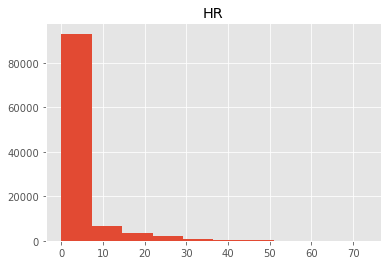

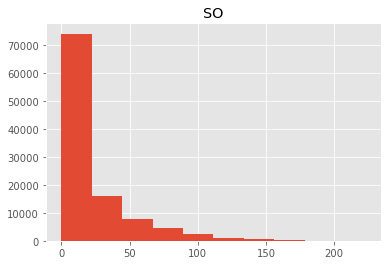

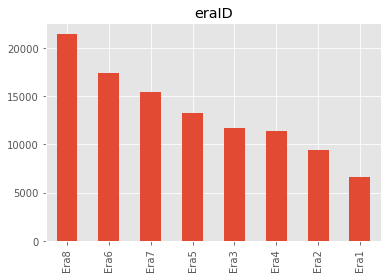

In [16]:
df_num = df[['HR','SO']]
df_cat = df[['eraID']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
    
for i in df_cat.columns:
    df_cat[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

# Merging rows with the same 'playerID'

As already mentioned, the same player can play in several seasons, therefore the same playerID appears in multiple rows corresponding to different seasons.

After dropping rows with missing SO values, there are 19,445 unique players.

Since each observation should be an independent observation, we should merge rows with the same playerID (e.g., the same player but data for a different season).

In [17]:
aggregation_functions = {'HR': 'sum', 'SO': 'sum'}
df_byplayerID = df.groupby(df['playerID']).aggregate(aggregation_functions)
df_byplayerID

,HR,SO
playerID,,
aardsda01,0,2.0
aaronha01,755,1383.0
aaronto01,13,145.0
aasedo01,0,3.0
abadan01,0,5.0
...,...,...
zupofr01,0,6.0
zuvelpa01,2,50.0
zuverge01,0,39.0


In [18]:
df_byplayerID.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, aardsda01 to zychto01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HR      19445 non-null  int64  
 1   SO      19445 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 455.7+ KB


In [19]:
df_byplayerID.nunique()

HR     394
SO    1169
dtype: int64

In [20]:
df_byplayerID.isnull().sum()

HR    0
SO    0
dtype: int64

In [21]:
df_byplayerID.describe()

,HR,SO
count,19445.000000,19445.000000
mean,15.874364,112.805657
std,51.090849,235.376219
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,15.000000
75%,5.000000,105.000000
max,762.000000,2597.000000


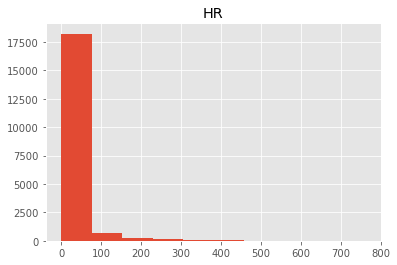

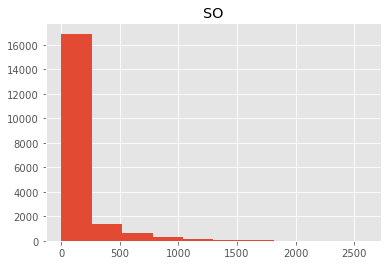

In [22]:
df_num = df_byplayerID[['HR','SO']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

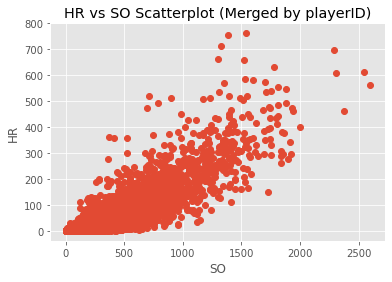

In [23]:
plt.plot(df_byplayerID.SO, df_byplayerID.HR, 'o')
plt.title('HR vs SO Scatterplot (Merged by playerID)')
plt.xlabel('SO')
plt.ylabel('HR')
plt.show()

<ipython-input-95-5192b8a47cdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HR:SO ratio'] = np.where(df['SO']!= 0, df['HR'] / df['SO'], df['HR'] / 0.1)


<AxesSubplot:xlabel='eraID'>

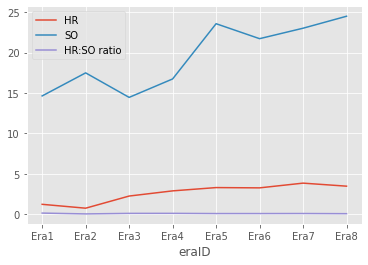

In [95]:
# do you guys have a better idea on how to deal with players that have HRs but no SOs?
df['HR:SO ratio'] = np.where(df['SO']!= 0, df['HR'] / df['SO'], df['HR'] / 0.1)

test = df.drop(columns = 'yearID')
era = test.groupby('eraID').mean()
era.plot()

In [96]:
era
# shows that other than era2 the ratio is a general downward trend

,HR,SO,HR:SO ratio
eraID,,,
Era1,1.224351,14.641370,0.139313
Era2,0.745119,17.495543,0.036612
Era3,2.248329,14.460925,0.103189
Era4,2.888714,16.742547,0.106677
Era5,3.296322,23.580230,0.080107
Era6,3.261279,21.728433,0.080134
Era7,3.846940,23.022060,0.085594
Era8,3.471644,24.504311,0.065558


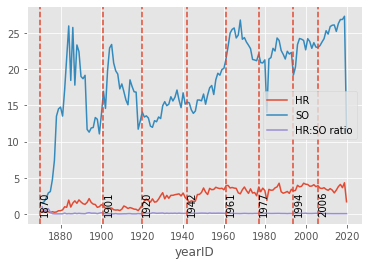

In [89]:
year = df.groupby('yearID').mean()
year.plot()
eraline = [1870,1901,1920,1942,1961,1977,1994,2006]
# separating the graph by era
for i in eraline:
    plt.axvline(x=i, linestyle="dashed")
    plt.text(i,0,i,rotation=90)

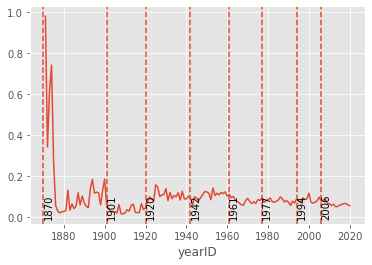

In [70]:
year['HR:SO ratio'].plot()
eraline = [1870,1901,1920,1942,1961,1977,1994,2006]
# separating the graph by era
for i in eraline:
    plt.axvline(x=i, linestyle="dashed")
    plt.text(i,0,i,rotation=90)

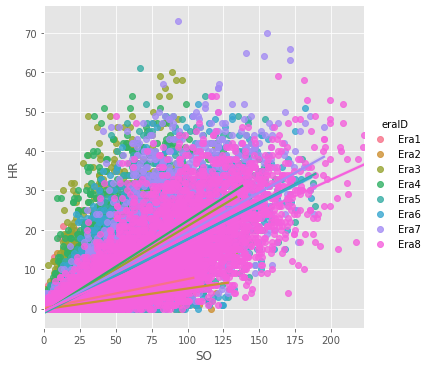

In [71]:
# plotting HR vs SO and differentiating based on era
# wanted an overlay of the different eras. Eventhough it is messy, you can see the shift from different eras
baseball = sns.lmplot(x='SO', y='HR', hue='eraID', data=df)

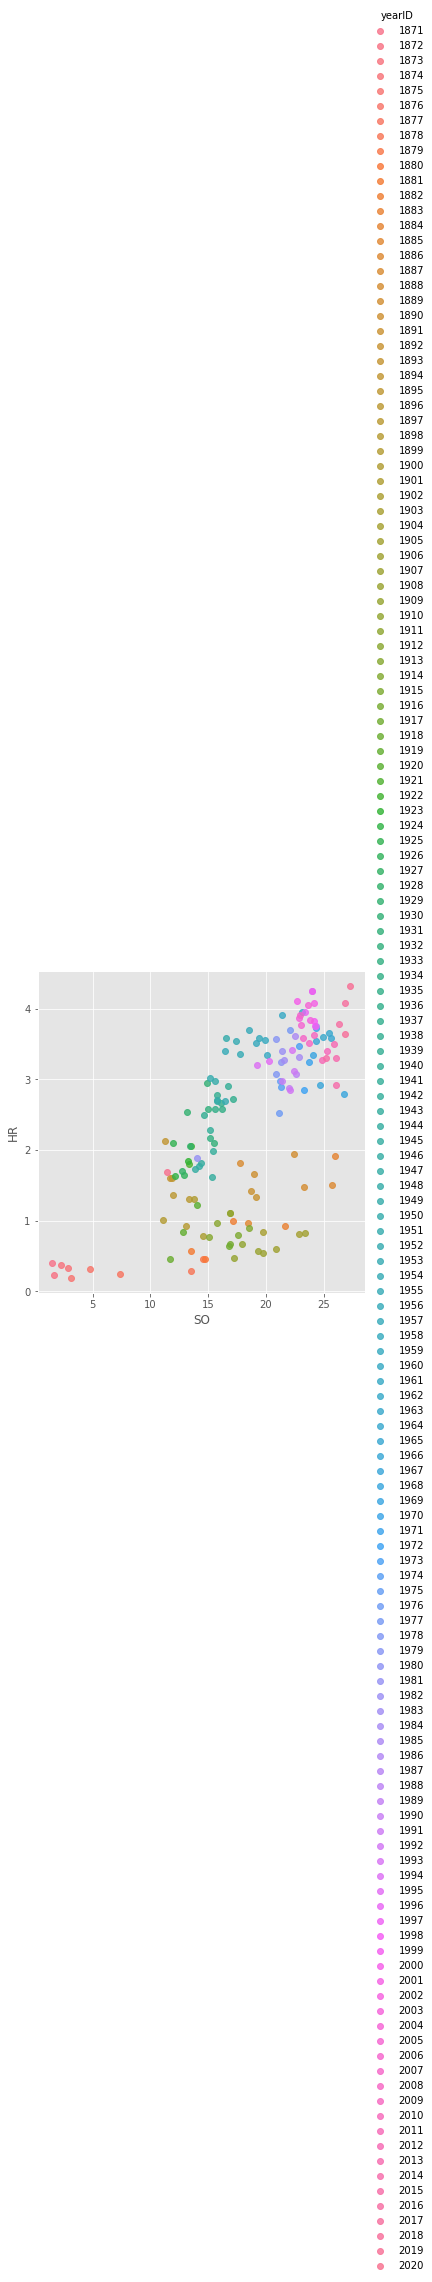

In [100]:
year['yearID'] = year.index
baseballyears = sns.lmplot(x='SO', y='HR', hue='yearID', data=year)

# as time progresses players generally strike out more as well as hit more home runs

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

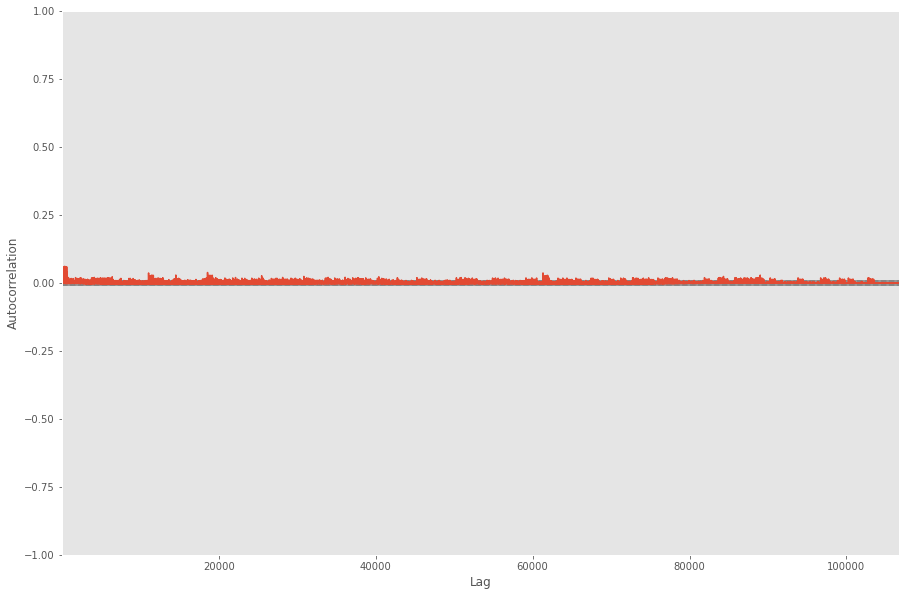

In [77]:
plt.figure(figsize=(15,10))
autocorrelation_plot(df['HR:SO ratio'])

# shows time has very little effect

In [102]:
df.groupby('eraID').describe()

# what is interesting here is that even tho the general HR:SO trend is down, the top quartile of players have better successes in recent history than early history
# also as noted by Charlie, there are a large amound of players hitting 0 HRs

yearID                                                                      HR                                                     SO                                                    HR:SO ratio                                                   
         count         mean       std     min     25%     50%     75%     max    count      mean       std  min  25%  50%  75%   max    count       mean        std  min  25%   50%   75%    max       count      mean       std  min  25%  50%       75%   max
eraID                                                                                                                                                                                                                                                          
Era1    6628.0  1888.367230  8.007072  1871.0  1883.0  1890.0  1895.0  1900.0   6628.0  1.224351  2.417162  0.0  0.0  0.0  1.0  27.0   6628.0  14.641370  15.386507  0.0  2.0  10.0  22.0  104.0      6628.0  0.139313  1.141466  0.0  0.0  0.0  0.083333  40.0
Era2    9424.0  1910.695352  5.418713  1901.0  1906.0  1911.0  1915.0  1919.0   9424.0  0.745119  1.800509  0.0  0.0  0.0  1.0  29.0   9424.0  17.495543  17.993861  0.0  3.0  12.0  27.0  128.0      9424.0  0.036612  0.348069  0.0  0.0  0.0  0.027027  20.0
Era3   11670.0  1930.571380  6.385991  1920.0  1925.0  1930.0  1936.0  1941.0  11670.0  2.248329  5.370260  0.0  0.0  0.0  2.0  60.0  11670.0  14.460925  16.397903  0.0  2.0   9.0  21.0  134.0     11670.0  0.103189  0.425238  0.0  0.0  0.0  0.115385  20.0
Era4   11439.0  1951.197395  5.464811  1942.0  1946.0  1951.0  1956.0  1960.0  11439.0  2.888714  6.259690  0.0  0.0  0.0  2.0  54.0  11439.0  16.742547  20.147703  0.0  2.0   9.0  24.0  138.0     11439.0  0.106677  0.399642  0.0  0.0  0.0  0.136364  10.0
Era5   13212.0  1968.873978  4.571613  1961.0  1965.0  1969.0  1973.0  1976.0  13212.0  3.296322  6.732724  0.0  0.0  0.0  3.0  61.0  13212.0  23.580230  28.432479  0.0  2.0  12.0  35.0  189.0     13212.0  0.080107  0.301135  0.0  0.0  0.0  0.112979  10.0
Era6   17399.0  1985.267084  4.928375  1977.0  1981.0  1985.0  1990.0  1993.0  17399.0  3.261279  6.617922  0.0  0.0  0.0  3.0  52.0  17399.0  21.728433  29.656668  0.0  0.0   8.0  33.0  186.0     17399.0  0.080134  0.333668  0.0  0.0  0.0  0.115385  20.0
Era7   15458.0  1999.672920  3.393823  1994.0  1997.0  2000.0  2003.0  2005.0  15458.0  3.846940  7.932268  0.0  0.0  0.0  4.0  73.0  15458.0  23.022060  33.021976  0.0  0.0   6.0  34.0  195.0     15458.0  0.085594  0.363890  0.0  0.0  0.0  0.123457  10.0
Era8   21459.0  2013.128664  4.312712  2006.0  2009.0  2013.0  2017.0  2020.0  21459.0  3.471644  7.216069  0.0  0.0  0.0  3.0  59.0  21459.0  24.504311  37.401555  0.0  0.0   4.0  35.0  223.0     21459.0  0.065558  0.297183  0.0  0.0  0.0  0.100000  10.0

In [103]:
df.groupby('yearID').describe()

HR                                                    SO                                                   HR:SO ratio                                                   
         count      mean       std  min  25%  50%  75%   max   count       mean        std  min  25%  50%   75%    max       count      mean       std  min  25%  50%       75%   max
yearID                                                                                                                                                                               
1871     115.0  0.408696  0.916665  0.0  0.0  0.0  0.0   4.0   115.0   1.521739   1.851258  0.0  0.0  1.0   2.0    8.0       115.0  0.977723  4.006070  0.0  0.0  0.0  0.000000  30.0
1872     157.0  0.235669  0.752263  0.0  0.0  0.0  0.0   7.0   157.0   1.687898   2.281063  0.0  0.0  1.0   2.0   14.0       157.0  0.342470  2.528440  0.0  0.0  0.0  0.000000  30.0
1873     125.0  0.376000  0.747728  0.0  0.0  0.0  1.0   4.0   125.0   2.224000   2.822330  0.0  0.0  1.0   4.0   14.0       125.0  0.610025  3.066680  0.0  0.0  0.0  0.076923  30.0
1874     123.0  0.325203  0.794406  0.0  0.0  0.0  0.0   5.0   123.0   2.902439   3.312704  0.0  0.0  2.0   4.0   13.0       123.0  0.740805  3.560994  0.0  0.0  0.0  0.000000  30.0
1875     217.0  0.184332  0.702597  0.0  0.0  0.0  0.0   6.0   217.0   3.110599   3.417917  0.0  1.0  2.0   5.0   21.0       217.0  0.270295  2.797440  0.0  0.0  0.0  0.000000  40.0
...        ...       ...       ...  ...  ...  ...  ...   ...     ...        ...        ...  ...  ...  ...   ...    ...         ...       ...       ...  ...  ...  ...       ...   ...
2016    1483.0  3.782873  7.863979  0.0  0.0  0.0  3.0  47.0  1483.0  26.285907  40.847109  0.0  0.0  4.0  38.0  219.0      1483.0  0.062643  0.278387  0.0  0.0  0.0  0.094916  10.0
2017    1494.0  4.086345  8.194793  0.0  0.0  0.0  4.0  59.0  1494.0  26.843373  41.332651  0.0  0.0  3.0  38.0  208.0      1494.0  0.065786  0.276026  0.0  0.0  0.0  0.106596  10.0
2018    1535.0  3.638436  7.358147  0.0  0.0  0.0  3.0  48.0  1535.0  26.844951  41.436235  0.0  0.0  3.0  39.0  217.0      1535.0  0.067831  0.371647  0.0  0.0  0.0  0.100000  10.0
2019    1569.0  4.318674  8.660352  0.0  0.0  0.0  4.0  53.0  1569.0  27.293180  41.917551  0.0  0.0  3.0  39.0  189.0      1569.0  0.060544  0.100570  0.0  0.0  0.0  0.111111   1.0
2020    1360.0  1.694118  3.393362  0.0  0.0  0.0  2.0  22.0  1360.0  11.460294  18.006414  0.0  0.0  0.0  19.0   90.0      1360.0  0.056366  0.106761  0.0  0.0  0.0  0.093205   1.0

[150 rows x 24 columns]